In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as opt
import os

In [2]:
os.chdir(r'C:\STUDY\content\Andrew Ng\machine-learning-ex2\ex2')

In [3]:
data = pd.read_csv('ex2data1.txt',names=['Exam 1','Exam 2','Result'])

In [9]:
data.head(12)

,Exam 1,Exam 2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [19]:
passed = data[data['Result'].isin([1])]
failed = data[data['Result'].isin([0])]
passed.head()

,Exam 1,Exam 2,Result
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [17]:
failed.head()

,Exam 1,Exam 2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


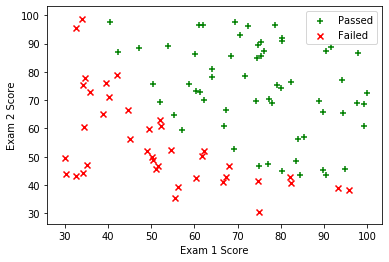

In [65]:
%matplotlib inline
plt.scatter(passed['Exam 1'] , passed['Exam 2'] , c='g' , marker = '+' , label='Passed')
plt.scatter(failed['Exam 1'] , failed['Exam 2'] , c='r' , marker = 'x' , label='Failed')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()

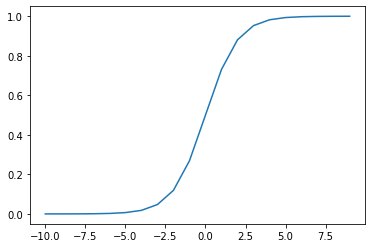

In [40]:
def sigmoid(x):
    z = 1 /(1 + np.exp(-x))
    return z
x = np.arange(-10,10,1)
%matplotlib inline
plt.plot(x,sigmoid(x))
plt.show()

In [52]:
def CostFunction(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    m = len(X)
    
    J = ( (y.T * np.log(sigmoid(X*theta.T))) + ((1-y).T * np.log(1-sigmoid(X*theta.T))) ) / (-m)
    return J

In [42]:
data.insert(0,'Ones',1)
data.head()

,Ones,Exam 1,Exam 2,Result
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [50]:
X = data.loc[:,['Ones','Exam 1','Exam 2']]
y = data.loc[:,['Result']]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(X.shape[1])

X.shape , y.shape , theta.shape

((100, 3), (100, 1), (3,))

In [53]:
CostFunction(theta,X,y)

matrix([[0.69314718]])

In [54]:
def Gradient(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    grad = ( X.T * (sigmoid(X*theta.T) - y) ) / len(X)
    
    return grad

In [56]:
Gradient(theta,X,y)

matrix([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]])

In [61]:
result = opt.fmin_tnc(func=CostFunction , fprime=Gradient , x0=theta , args=(X,y))
result

(array([-25.16131862,   0.20623159,   0.20147149]), 36, 0)

In [92]:
optimal_parameters = result[0]
print(CostFunction(optimal_parameters,X,y))
optimal_parameters

[[0.2034977]]


array([-25.16131862,   0.20623159,   0.20147149])

In [94]:
x1_max , x1_min = data['Exam 1'].max() , data['Exam 1'].min()

x_axis = np.array([x1_min , x1_max])
y_axis = ( - optimal_parameters[0] - optimal_parameters[1]*x_axis ) / optimal_parameters[2]
# P(y=1|x) = P(y=0|x) = 1/2
# 1 / (1 + e^(-theta.T * X)) = 1/2
# for this to lod true , e^(-theta.T * X)) should be equal to zero -> e^0 = 1 ; 1/(1+1) = 1/2
# S0 , e^(-theta.T * X)) = 0
# theta_0 + theata_1*x1 +theta_2*x2 = 0 (considering binary case)
# x_2 = -(theta_0 + theta_1*x1) / theta_2
# y_axis = x_2 = decision boundary

x_axis, y_axis

(array([30.05882245, 99.8278578 ]), array([94.11872752, 22.70128166]))

<IPython.core.display.Javascript object>


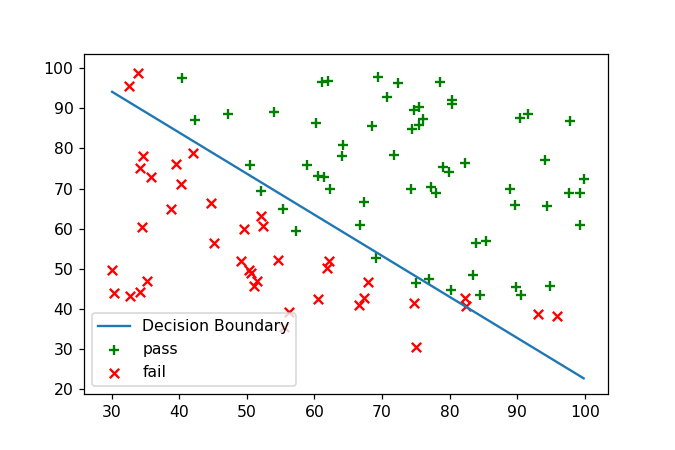

In [97]:
%matplotlib notebook
plt.scatter(passed['Exam 1'],passed['Exam 2'],c='g',marker='+',label='pass')
plt.scatter(failed['Exam 1'],failed['Exam 2'],c='r',marker='x',label='fail')
plt.plot(x_axis,y_axis,label='Decision Boundary')
plt.legend()

In [115]:
def predict(theta,X):
    X,theta = np.matrix(X) , np.matrix(theta)
    probability = sigmoid(X*theta.T)         #(1 x n+1) * (n+1 x 1) = 1x1
    result = [1 if p>=0.5 else 0 for p in probability]
    return(result)

In [116]:
predict(optimal_parameters,[1,60,63])

[0]

In [119]:
predictions = predict(optimal_parameters,X)
correct_predictions = [1 if (p==1 and a==1) or (p==0 and a==0) else 0 for (p,a) in zip(predictions,y)]
accuracy  = np.mean(correct_predictions)*100
print('accuracy = {} %'.format(accuracy))

accuracy = 89.0 %


# Badhai ho , Binary Classification hua hai !!